# **Colon Cancer Classification using CNN**

v.duvvuri@northeastern.edu (Venkata Duvvuri)

ren.zhenz@northeastern.edu （Zhenzhen Ren)

Joanneshaw0220@gmail.com (Joanne shaw)


Label 1: 280 colon kras data (7 cases)

Label 2: 400 colon non kras data (10 cases)

Label 3: Randomly selected 1000 data from all TCGA cancer, which include:

TCGA-BLCA

TCGA-BRCA

TCGA-CESC

TCGA-ESCA

TCGA-KIRC

TCGA-KIRP

TCGA-LIHC

TCGA-LUAD

TCGA-LUSC

TCGA-OV

TCGA-PRAD

TCGA-READ

TCGA-SARC

TCGA-STAD

TCGA-THCA

TCGA-UCEC

## **Import libraries**

In [52]:
#install dicon2jpg
!pip install dicom2jpg #used to convert DICOM images into JPG format

import dicom2jpg

# Import library for splitting folders
!pip install split-folders
import splitfolders

# Import main libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from matplotlib.image import imread 
from PIL import Image
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# Import libraries for image preprocessing
from skimage import exposure

# Import libraries for data augmentation and splitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Import libraries for CNN model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Visualizing a Keras model's architecture
!pip install pydot graphviz
from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Data Preprocessing**

In [ ]:
#Converting a group of DICOM (Digital Imaging and Communications in Medicine) images into JPG format.
dicom_dir = "/content/drive/MyDrive/Cancer project/COAD/TCGA-COAD"
export_location = "/content/drive/MyDrive/Cancer project/COAD/COAD_JPG"

# convert all DICOM files in dicom_dir folder to jpg format
dicom2jpg.dicom2jpg(dicom_dir, export_location)

/usr/local/lib/python3.7/dist-packages/dicom2jpg/utils.py:120: RuntimeWarning: invalid value encountered in true_divide
  pixel_array = ((pixel_array-pixel_array.min())/(pixel_array.max()-pixel_array.min())) * 255.0
/usr/local/lib/python3.7/dist-packages/dicom2jpg/utils.py:120: RuntimeWarning: invalid value encountered in true_divide
  pixel_array = ((pixel_array-pixel_array.min())/(pixel_array.max()-pixel_array.min())) * 255.0


True

In [ ]:
#split the dataset into training, validation, and testing sets.
input_folder = "/content/drive/MyDrive/Cancer project/model1/data"
output = "/content/drive/MyDrive/Cancer project/model1/train" 

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



Copying files: 0 files [00:00, ? files/s]
Copying files: 2 files [00:00, 18.48 files/s]
Copying files: 10 files [00:00, 52.39 files/s]
Copying files: 21 files [00:00, 73.40 files/s]
Copying files: 30 files [00:00, 78.11 files/s]
Copying files: 39 files [00:00, 81.86 files/s]
Copying files: 48 files [00:00, 81.87 files/s]
Copying files: 58 files [00:00, 83.45 files/s]
Copying files: 68 files [00:00, 86.84 files/s]
Copying files: 77 files [00:00, 83.06 files/s]
Copying files: 87 files [00:01, 86.24 files/s]
Copying files: 96 files [00:01, 84.09 files/s]
Copying files: 106 files [00:01, 88.28 files/s]
Copying files: 115 files [00:01, 86.83 files/s]
Copying files: 125 files [00:01, 89.44 files/s]
Copying files: 134 files [00:01, 86.44 files/s]
Copying files: 145 files [00:01, 89.59 files/s]
Copying files: 154 files [00:01, 85.75 files/s]
Copying files: 163 files [00:01, 83.17 files/s]
Copying files: 174 files [00:02, 89.81 files/s]
Copying files: 184 files [00:02, 86.34 files/s]
Copying f

##**1&2**
-colon kras VS colon non kras**



In [3]:
#define the paths to the training, testing, and validation datasets.
main_dirction_path = '/content/drive/MyDrive/Cancer project/model1/train'
print(os.listdir(main_dirction_path))

train_folder_path = main_dirction_path + '/train/'
test_folder_path = main_dirction_path + '/test/'
val_folder_path = main_dirction_path + '/val/'

['val', 'train', 'test']


In [4]:
# train 
os.listdir(train_folder_path)

['non_kras', 'kras']

In [5]:
train_nk_path = train_folder_path+'/non_kras/'
train_k_path = train_folder_path+'/kras/'

test_nk_path = test_folder_path+'/non_kras/'
test_k_path = test_folder_path+'/kras/'

In [6]:
#Count the number of images in each category (colon kras and colon non-kras) in the training dataset.

print(len(os.listdir(train_nk_path))) #length of non_kras training images
print(len(os.listdir(train_k_path))) #length of kras training images 
print('TOTAL TRAIN IMAGES:', len(os.listdir(train_nk_path)) + len(os.listdir(train_k_path)))


320
224
TOTAL TRAIN IMAGES: 544


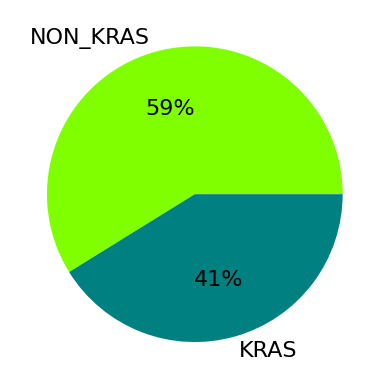

In [7]:
#The distribution of images in each category.
x = np.array([len(os.listdir(train_nk_path)),len(os.listdir(train_k_path))])
labels = ['NON_KRAS', 'KRAS']
colors = {'NON_KRAS': 'chartreuse','KRAS': 'teal' }
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1, colors = [colors[key] for key in labels], textprops={'fontsize': 16})
plt.show()

(-0.5, 511.5, 511.5, -0.5)

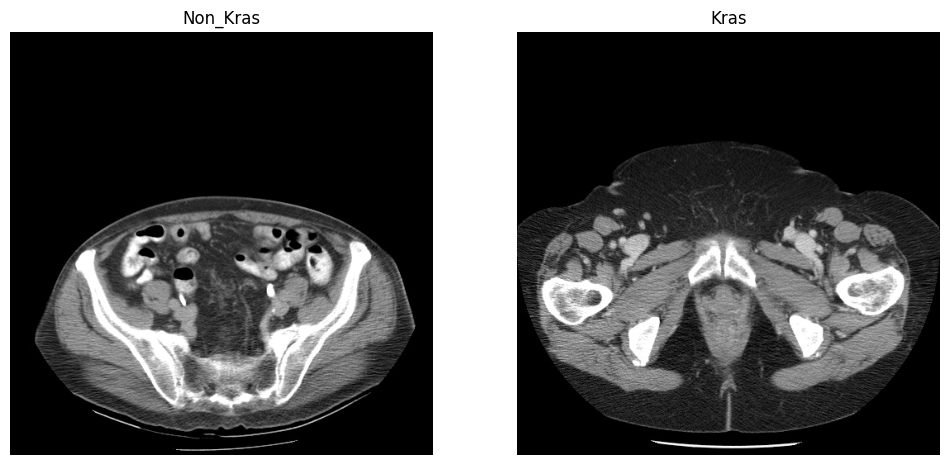

In [8]:
#Visualize random samples of non-kras and kras images. 

# Choose random image from non kras folder
random_non_kras= np.random.randint(0,len(os.listdir(train_nk_path))) 
non_kras_img = os.listdir(train_nk_path)[random_non_kras]
non_kras_img_address = train_nk_path+non_kras_img

# Choose random image from kras folder
random_kras = np.random.randint(0,len(os.listdir(train_k_path)))
kras_img =  os.listdir(train_k_path)[random_kras]
kras_img_address = train_k_path+kras_img

#Load 2 images
non_kras_load = Image.open(non_kras_img_address)
kras_load = Image.open(kras_img_address)

#Visulaizaion 
figure = plt.figure(figsize= (12,12))
img1 = figure.add_subplot(1,2,1)
img_plot = plt.imshow(non_kras_load, cmap = 'gray')
img1.set_title('Non_Kras')
plt.axis("off")

img2 = figure.add_subplot(1, 2, 2)
img_plot = plt.imshow(kras_load, cmap = 'gray')
img2.set_title('Kras')
plt.axis("off")

In [9]:
#Preprocess images by equalizing their histograms for better contrast using the exposure.equalize_hist() function.
img = np.asarray(non_kras_load)
image_eq = exposure.equalize_hist(img)

(-0.5, 511.5, 511.5, -0.5)

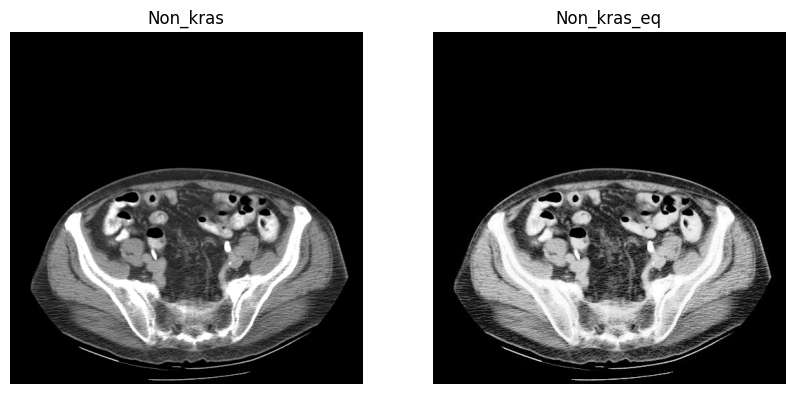

In [10]:
figure1 = plt.figure(figsize= (10,10))
img_1 = figure1.add_subplot(1,2,1)
img_plot = plt.imshow(img, cmap = 'gray')
img_1.set_title('Non_kras')
plt.axis("off")

img2 = figure1.add_subplot(1, 2, 2)
img_plot = plt.imshow(image_eq, cmap = 'gray')
img2.set_title('Non_kras_eq')
plt.axis("off")

In [11]:
def equlize_hist_ (image):
  _image = np.asarray(image)
  image_eq = exposure.equalize_hist(_image)
  return image_eq

In [12]:
os.listdir(train_folder_path)

['non_kras', 'kras']

In [13]:
#Calculate class weights to handle class imbalance in the dataset

TRAIN_IMG_COUNT = len(os.listdir(train_nk_path)) + len(os.listdir(train_k_path))
COUNT_NON_KRAS = len(os.listdir(train_nk_path))
COUNT_KRAS = len(os.listdir(train_k_path))

weight_for_0 = TRAIN_IMG_COUNT / (2 * COUNT_NON_KRAS)
weight_for_1 = TRAIN_IMG_COUNT / (2 * COUNT_KRAS)

class_weight = {0: weight_for_0, 1: weight_for_1}

In [14]:
(weight_for_0)

0.85

In [15]:
weight_for_1

1.2142857142857142

In [16]:
#Create ImageDataGenerators for training, validation, and testing sets with data augmentation (rescale, shear, zoom, horizontal flip).
img_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.25,
                                   horizontal_flip = True)


training_set = img_datagen.flow_from_directory('/content/drive/MyDrive/Cancer project/model1/train/train',
                                                 target_size = (256, 256),
                                                 batch_size = 5,
                                                 color_mode='grayscale',
                                                 subset='training',
                                                 class_mode = 'binary')

validation_generator = img_datagen.flow_from_directory('/content/drive/MyDrive/Cancer project/model1/train/val',
                                                        target_size=(256, 256),
                                                        batch_size=5,
                                                        subset="validation",
                                                        color_mode='grayscale',
                                                        class_mode='binary')

test_set = img_datagen.flow_from_directory('/content/drive/MyDrive/Cancer project/model1/train/test',
                                            target_size = (256, 256),
                                            batch_size = 5,
                                            color_mode='grayscale',
                                            shuffle=False,
                                            class_mode = 'binary')


Found 408 images belonging to 2 classes.
Found 17 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [17]:
#Define the CNN model architecture with multiple Conv2D, MaxPooling2D, Dropout, and Dense layers, as well as Batch Normalization.
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

#Compile the model with the Adam optimizer and binary cross-entropy loss function.
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Display the model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 252, 252, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                        

In [ ]:
#Train and evaluate the model multiple times (n_runs) using a for loop. For each run, perform the following steps:
n_runs = 5
results = []

for i in range(n_runs):
    #Train the model using the training set, with class weights to address class imbalance.
    history = model.fit(training_set,
                        epochs = 4,
                        steps_per_epoch = training_set.samples // 5,
                        validation_data = validation_generator,
                        validation_steps = validation_generator.samples // 5,
                        class_weight = class_weight)
    
    # Evaluate the model on the test set and print the test loss and accuracy.
    loss, acc = model.evaluate(test_set)
    print(f"Run {i+1} - Test Loss: {loss}, Test Accuracy: {acc}")
    
    # Make predictions on the test set and convert them to binary classes.
    predictions = model.predict(test_set)
    predictions = (predictions > 0.5).astype(np.int)
    
    #Print a classification report containing precision, recall, f1-score, and support for each class.
    report = classification_report(test_set.classes, predictions, target_names = ['Colon_Non_kras', 'Colon_Kras'])
    print(report)
    
    # Store the results (loss, accuracy, and report) in a list for later analysis.
    results.append({'loss': loss, 'accuracy': acc, 'report': report})


Epoch 1/4
81/81 [==============================] - 166s 2s/step - loss: 0.3520 - accuracy: 0.8288 - val_loss: 1.2956 - val_accuracy: 0.6000
Epoch 2/4
81/81 [==============================] - 164s 2s/step - loss: 0.3011 - accuracy: 0.8883 - val_loss: 1.0168 - val_accuracy: 0.7333
Epoch 3/4
81/81 [==============================] - 166s 2s/step - loss: 0.3248 - accuracy: 0.8586 - val_loss: 1.1916 - val_accuracy: 0.6667
Epoch 4/4
14/14 [==============================] - 6s 407ms/step - loss: 1.2625 - accuracy: 0.7794
Run 1 - Test Loss: 1.2624632120132446, Test Accuracy: 0.779411792755127
14/14 [==============================] - 7s 500ms/step
                precision    recall  f1-score   support

Colon_Non_kras       0.60      0.96      0.74        28
    Colon_Kras       0.96      0.55      0.70        40

      accuracy                           0.72        68
     macro avg       0.78      0.76      0.72        68
  weighted avg       0.81      0.72      0.72        68

Epoch 1/4
81/81

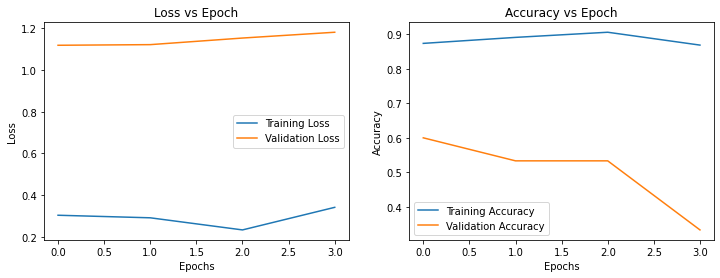

In [ ]:
# Loss/Accuracy vs Epoch
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epoch')
plt.show()

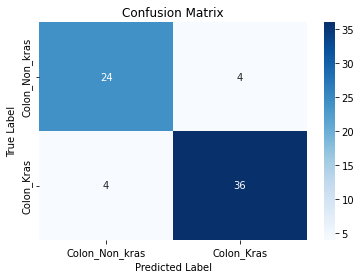

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_set.classes, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Colon_Non_kras', 'Colon_Kras'], yticklabels=['Colon_Non_kras', 'Colon_Kras'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

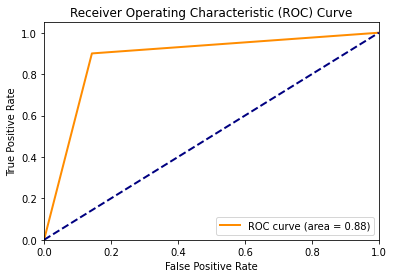

In [ ]:
# ROC-AUC curve
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, thresholds = roc_curve(test_set.classes, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

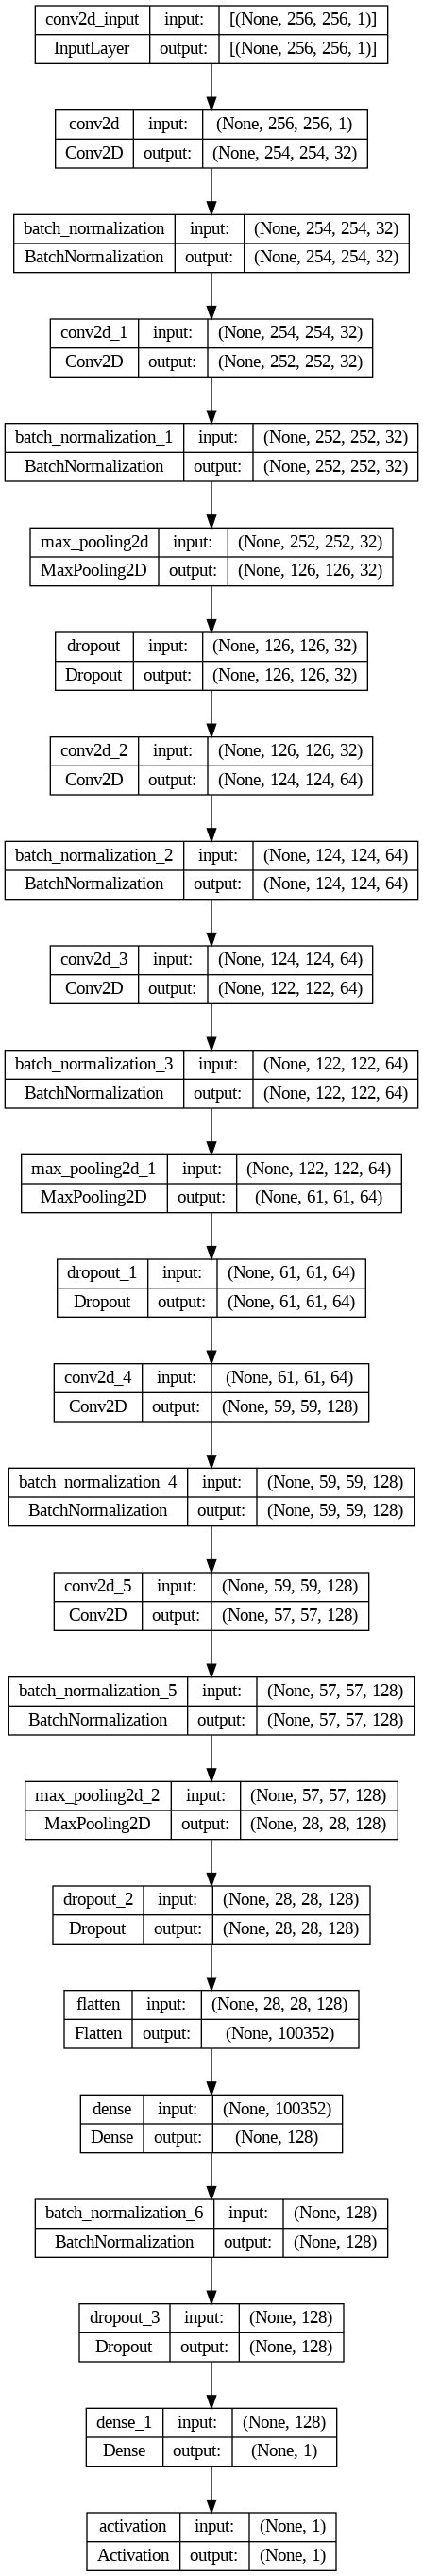

In [ ]:
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

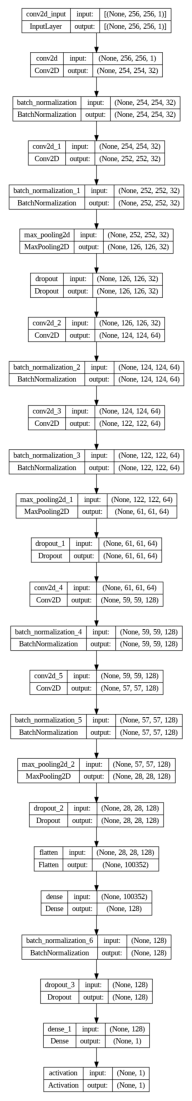

In [ ]:
img = mpimg.imread('model_architecture.png')
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.axis('off')
plt.show()

##**1&3**
-Colon kras VS All TCGA**

In [18]:
main_dirction_path = '/content/drive/MyDrive/Cancer project/13/train'
print(os.listdir(main_dirction_path))

['train', 'val', 'test']


In [19]:
train_folder_path = main_dirction_path + '/train/'
test_folder_path = main_dirction_path + '/test/'
val_folder_path = main_dirction_path + '/val/'

In [20]:
# train 
os.listdir(train_folder_path)

['renamed_all_tcga', 'kras']

In [21]:
train_all_path = train_folder_path+'/renamed_all_tcga/'
train_k_path = train_folder_path+'/kras/'

test_all_path = test_folder_path+'/renamed_all_tcga/'
test_k_path = test_folder_path+'/kras/'

In [22]:
#EDA

print(len(os.listdir(train_all_path))) #length of renamed_all_tcga training images
print(len(os.listdir(train_k_path))) #length of kras_colon training images 
print('TOTAL TRAIN IMAGES:', len(os.listdir(train_all_path)) + len(os.listdir(train_k_path)))

800
224
TOTAL TRAIN IMAGES: 1024


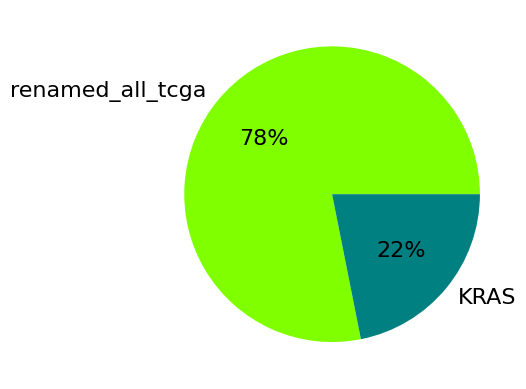

In [23]:
x = np.array([len(os.listdir(train_all_path)),len(os.listdir(train_k_path))])
labels = ['renamed_all_tcga', 'KRAS']
colors = {'renamed_all_tcga': 'chartreuse','KRAS': 'teal' }
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1, colors = [colors[key] for key in labels], textprops={'fontsize': 16})
plt.show()

(-0.5, 511.5, 511.5, -0.5)

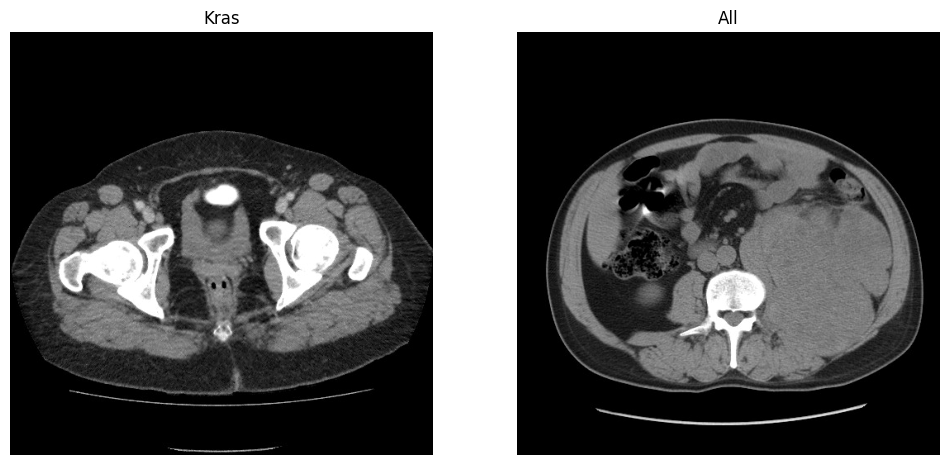

In [24]:
#Visulaization random samples of KRAS images and All tcga images: 

# Choose random image from non kras folder
random_kras= np.random.randint(0,len(os.listdir(train_k_path))) 
kras_img = os.listdir(train_k_path)[random_kras]
kras_img_address = train_k_path+kras_img

# Choose random image from kras folder
random_all = np.random.randint(0,len(os.listdir(train_all_path)))
all_img =  os.listdir(train_all_path)[random_all]
all_img_address = train_all_path+all_img

#Load 2 images
kras_load = Image.open(kras_img_address)
all_load = Image.open(all_img_address)

#Visulaizaion 
figure = plt.figure(figsize= (12,12))
img1 = figure.add_subplot(1,2,1)
img_plot = plt.imshow(kras_load, cmap = 'gray')
img1.set_title('Kras')
plt.axis("off")

img2 = figure.add_subplot(1, 2, 2)
img_plot = plt.imshow(all_load, cmap = 'gray')
img2.set_title('All')
plt.axis("off")

In [25]:
img = np.asarray(all_load)
image_eq = exposure.equalize_hist(img)

(-0.5, 511.5, 511.5, -0.5)

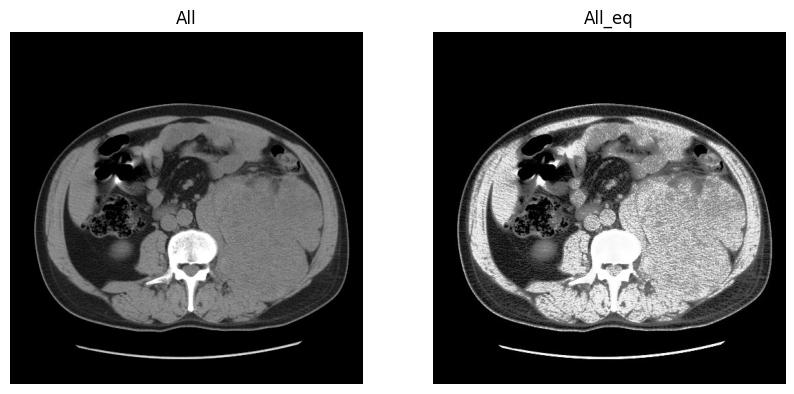

In [26]:
figure1 = plt.figure(figsize= (10,10))
img_1 = figure1.add_subplot(1,2,1)
img_plot = plt.imshow(img, cmap = 'gray')
img_1.set_title('All')
plt.axis("off")

img2 = figure1.add_subplot(1, 2, 2)
img_plot = plt.imshow(image_eq, cmap = 'gray')
img2.set_title('All_eq')
plt.axis("off")


In [27]:
def equlize_hist_ (image):
  _image = np.asarray(image)
  image_eq = exposure.equalize_hist(_image)
  return image_eq

In [28]:
os.listdir(train_folder_path)

['renamed_all_tcga', 'kras']

In [29]:
#Improve Class Imbalance using Class Weights: 

TRAIN_IMG_COUNT = len(os.listdir(train_all_path)) + len(os.listdir(train_k_path))
COUNT_ALL = len(os.listdir(train_all_path))
COUNT_KRAS = len(os.listdir(train_k_path))

weight_for_0 = TRAIN_IMG_COUNT / (2 * COUNT_ALL)
weight_for_1 = TRAIN_IMG_COUNT / (2 * COUNT_KRAS)

class_weight = {0: weight_for_0, 1: weight_for_1}

In [30]:
img_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.25,
                                   horizontal_flip = True)


training_set = img_datagen.flow_from_directory('/content/drive/MyDrive/Cancer project/13/train/train',
                                                 target_size = (256, 256),
                                                 batch_size = 5,
                                                 color_mode='grayscale',
                                                 subset='training',
                                                 class_mode = 'binary')

validation_generator = img_datagen.flow_from_directory('/content/drive/MyDrive/Cancer project/13/train/val',
                                                        target_size=(256, 256),
                                                        batch_size=5,
                                                        subset="validation",
                                                        color_mode='grayscale',
                                                        class_mode='binary')

test_set = img_datagen.flow_from_directory('/content/drive/MyDrive/Cancer project/13/train/test',
                                            target_size = (256, 256),
                                            batch_size = 5,
                                            color_mode='grayscale',
                                            shuffle=False,
                                            class_mode = 'binary')

Found 768 images belonging to 2 classes.
Found 32 images belonging to 2 classes.
Found 128 images belonging to 2 classes.


In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 batch_normalization_7 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 batch_normalization_8 (Batc  (None, 252, 252, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                      

In [ ]:
n_runs = 5
results = []

for i in range(n_runs):
    # Train the model
    history = model.fit(training_set,
                        epochs = 1,
                        steps_per_epoch = training_set.samples // 5,
                        validation_data = validation_generator,
                        validation_steps = validation_generator.samples // 5,
                        class_weight = class_weight)
    
    # Evaluate the model on the test set
    loss, acc = model.evaluate(test_set)
    print(f"Run {i+1} - Test Loss: {loss}, Test Accuracy: {acc}")
    
    # Make predictions on the test set
    predictions = model.predict(test_set)
    predictions = (predictions > 0.5).astype(np.int)
    
    # Print the classification report
    report = classification_report(test_set.classes, predictions, target_names = ['All_tcga', 'Colon_kras'])
    print(report)
    
    # Store the results in a list
    results.append({'loss': loss, 'accuracy': acc, 'report': report})

26/26 [==============================] - 18s 702ms/step - loss: 0.5369 - accuracy: 0.8047
Run 1 - Test Loss: 0.5369299054145813, Test Accuracy: 0.8046875
26/26 [==============================] - 19s 750ms/step
              precision    recall  f1-score   support

    All_tcga       0.75      0.11      0.19        28
  Colon_kras       0.80      0.99      0.88       100

    accuracy                           0.80       128
   macro avg       0.77      0.55      0.54       128
weighted avg       0.79      0.80      0.73       128

26/26 [==============================] - 17s 649ms/step - loss: 4.4126 - accuracy: 0.7812
Run 2 - Test Loss: 4.412567615509033, Test Accuracy: 0.78125
26/26 [==============================] - 17s 667ms/step
              precision    recall  f1-score   support

    All_tcga       0.00      0.00      0.00        28
  Colon_kras       0.78      1.00      0.88       100

    accuracy                           0.78       128
   macro avg       0.39      0.50     

##**2&3**
-Colon non kras VS All TCGA

In [38]:
main_dirction_path = '/content/drive/MyDrive/Cancer project/23/train'
print(os.listdir(main_dirction_path))

['train', 'val', 'test']


In [39]:
train_folder_path = main_dirction_path + '/train/'
test_folder_path = main_dirction_path + '/test/'
val_folder_path = main_dirction_path + '/val/'

In [40]:
# train 
os.listdir(train_folder_path)

['renamed_all_tcga', 'non_kras']

In [41]:
train_all_path = train_folder_path+'/renamed_all_tcga/'
train_nk_path = train_folder_path+'/non_kras/'

test_all_path = test_folder_path+'/renamed_all_tcga/'
test_nk_path = test_folder_path+'/non_kras/'

In [42]:
#EDA

print(len(os.listdir(train_all_path))) #length of renamed_all_tcga training images
print(len(os.listdir(train_nk_path))) #length of non_kras training images 
print('TOTAL TRAIN IMAGES:', len(os.listdir(train_all_path)) + len(os.listdir(train_nk_path)))

800
320
TOTAL TRAIN IMAGES: 1120


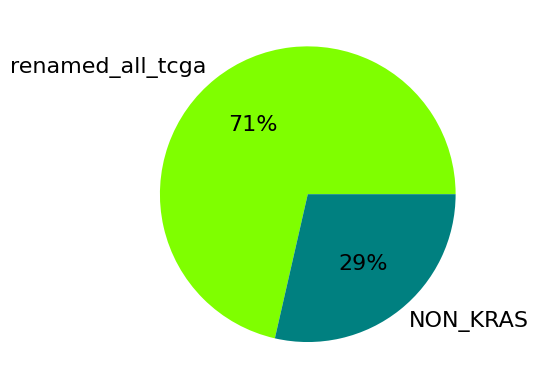

In [43]:
x = np.array([len(os.listdir(train_all_path)),len(os.listdir(train_nk_path))])
labels = ['renamed_all_tcga', 'NON_KRAS']
colors = {'renamed_all_tcga': 'chartreuse','NON_KRAS': 'teal' }
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1, colors = [colors[key] for key in labels], textprops={'fontsize': 16})
plt.show()

(-0.5, 511.5, 511.5, -0.5)

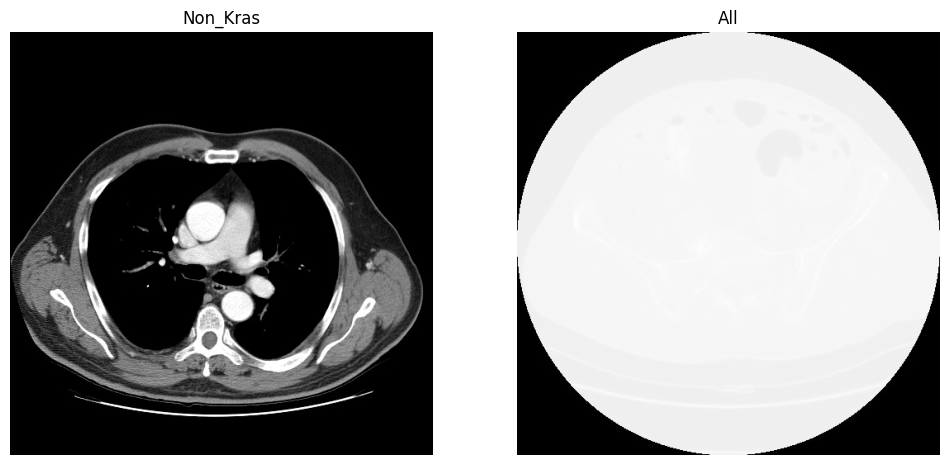

In [44]:
#Visulaization random samples of NON_KRAS images and KRAS images: 

# Choose random image from non kras folder
random_non_kras= np.random.randint(0,len(os.listdir(train_nk_path))) 
non_kras_img = os.listdir(train_nk_path)[random_non_kras]
non_kras_img_address = train_nk_path+non_kras_img

# Choose random image from kras folder
random_all = np.random.randint(0,len(os.listdir(train_all_path)))
all_img =  os.listdir(train_all_path)[random_all]
all_img_address = train_all_path+all_img

#Load 2 images
non_kras_load = Image.open(non_kras_img_address)
all_load = Image.open(all_img_address)

#Visulaizaion 
figure = plt.figure(figsize= (12,12))
img1 = figure.add_subplot(1,2,1)
img_plot = plt.imshow(non_kras_load, cmap = 'gray')
img1.set_title('Non_Kras')
plt.axis("off")

img2 = figure.add_subplot(1, 2, 2)
img_plot = plt.imshow(all_load, cmap = 'gray')
img2.set_title('All')
plt.axis("off")

In [45]:
img = np.asarray(all_load)
image_eq = exposure.equalize_hist(img)

(-0.5, 511.5, 511.5, -0.5)

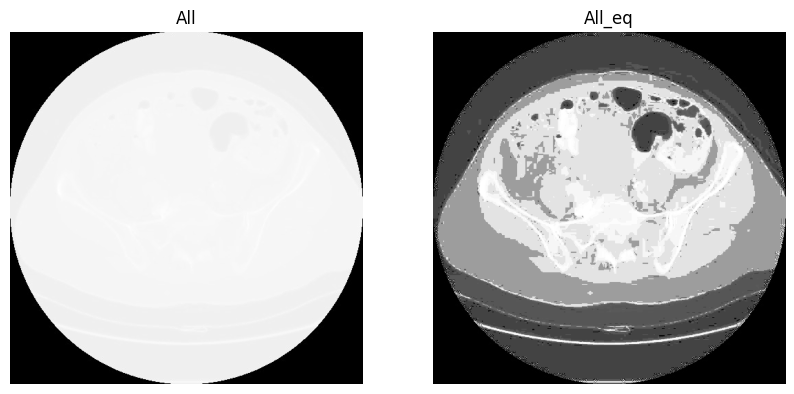

In [46]:
figure1 = plt.figure(figsize= (10,10))
img_1 = figure1.add_subplot(1,2,1)
img_plot = plt.imshow(img, cmap = 'gray')
img_1.set_title('All')
plt.axis("off")

img2 = figure1.add_subplot(1, 2, 2)
img_plot = plt.imshow(image_eq, cmap = 'gray')
img2.set_title('All_eq')
plt.axis("off")


In [47]:
def equlize_hist_ (image):
  _image = np.asarray(image)
  image_eq = exposure.equalize_hist(_image)
  return image_eq

In [48]:
os.listdir(train_folder_path)

['renamed_all_tcga', 'non_kras']

In [49]:
#Improve Class Imbalance using Class Weights: 

TRAIN_IMG_COUNT = len(os.listdir(train_all_path)) + len(os.listdir(train_nk_path))
COUNT_ALL = len(os.listdir(train_all_path))
COUNT_NON_KRAS = len(os.listdir(train_nk_path))

weight_for_0 = TRAIN_IMG_COUNT / (2 * COUNT_ALL)
weight_for_1 = TRAIN_IMG_COUNT / (2 * COUNT_NON_KRAS)

class_weight = {0: weight_for_0, 1: weight_for_1}

In [50]:
img_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.25,
                                   horizontal_flip = True)


training_set = img_datagen.flow_from_directory('/content/drive/MyDrive/Cancer project/23/train/train',
                                                 target_size = (256, 256),
                                                 batch_size = 5,
                                                 color_mode='grayscale',
                                                 subset='training',
                                                 class_mode = 'binary')

validation_generator = img_datagen.flow_from_directory('/content/drive/MyDrive/Cancer project/23/train/val',
                                                        target_size=(256, 256),
                                                        batch_size=5,
                                                        subset="validation",
                                                        color_mode='grayscale',
                                                        class_mode='binary')

test_set = img_datagen.flow_from_directory('/content/drive/MyDrive/Cancer project/23/train/test',
                                            target_size = (256, 256),
                                            batch_size = 5,
                                            color_mode='grayscale',
                                            shuffle=False,
                                            class_mode = 'binary')

Found 840 images belonging to 2 classes.
Found 35 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [51]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 batch_normalization_14 (Bat  (None, 254, 254, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 batch_normalization_15 (Bat  (None, 252, 252, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                      

In [ ]:
n_runs = 5
results = []

for i in range(n_runs):
    # Train the model
    history = model.fit(training_set,
                        epochs = 1,
                        steps_per_epoch = training_set.samples // 5,
                        validation_data = validation_generator,
                        validation_steps = validation_generator.samples // 5,
                        class_weight = class_weight) 
    
    # Evaluate the model on the test set
    loss, acc = model.evaluate(test_set)
    print(f"Run {i+1} - Test Loss: {loss}, Test Accuracy: {acc}")
    
    # Make predictions on the test set
    predictions = model.predict(test_set)
    predictions = (predictions > 0.5).astype(np.int)
    
    # Print the classification report
    report = classification_report(test_set.classes, predictions, target_names = ['All_tcga', 'Colon_non_kras'])
    print(report)
    
    # Store the results in a list
    results.append({'loss': loss, 'accuracy': acc, 'report': report})

28/28 [==============================] - 20s 725ms/step - loss: 1.4900 - accuracy: 0.7143
Run 1 - Test Loss: 1.4899582862854004, Test Accuracy: 0.7142857313156128
28/28 [==============================] - 19s 671ms/step
                precision    recall  f1-score   support

      All_tcga       0.00      0.00      0.00        40
Colon_non_kras       0.71      1.00      0.83       100

      accuracy                           0.71       140
     macro avg       0.36      0.50      0.42       140
  weighted avg       0.51      0.71      0.60       140

28/28 [==============================] - 19s 664ms/step - loss: 1.0696 - accuracy: 0.7143
Run 2 - Test Loss: 1.0695602893829346, Test Accuracy: 0.7142857313156128
28/28 [==============================] - 21s 757ms/step
                precision    recall  f1-score   support

      All_tcga       0.00      0.00      0.00        40
Colon_non_kras       0.71      1.00      0.83       100

      accuracy                           0.71       1